In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
image_path = ("G:\My Drive\Riyadh-Data-set\RUH_Row\RUH-B4-B8_2018-12-15.tif")

In [3]:
ds = gdal.Open(image_path)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


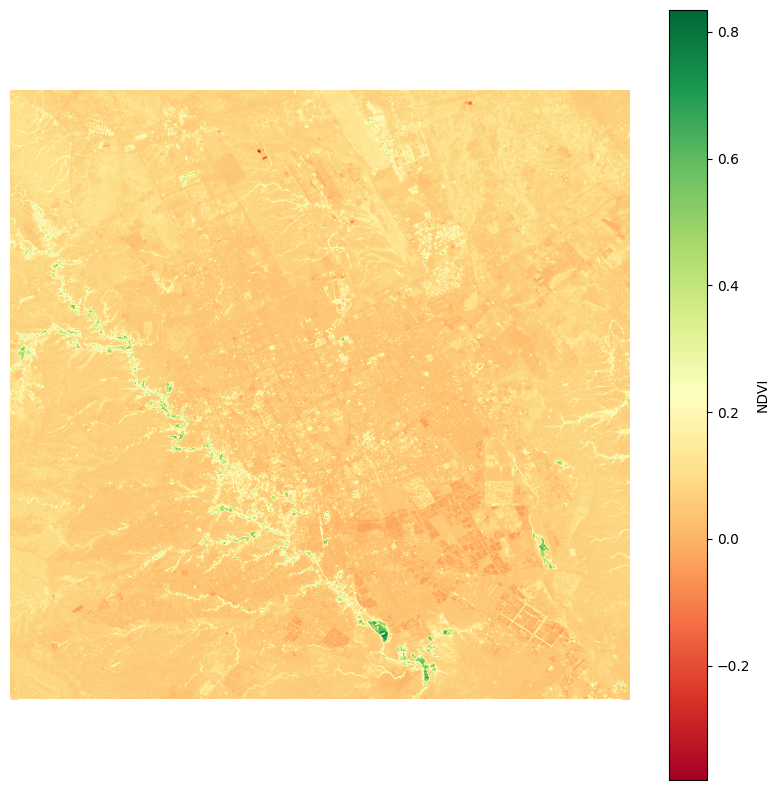

In [4]:
def read_band(band_number):
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band

red = read_band(1)  #  Band 1 is 4 (red band) 
nir = read_band(2)  # band 2 is 8 is (NIR band)\

ndvi = (nir - red) / (nir + red)


plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

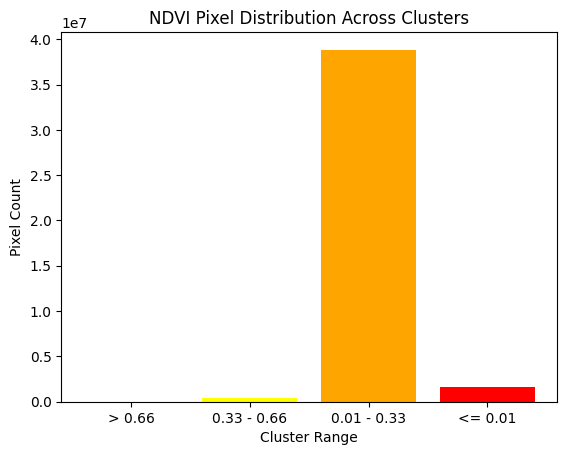

[13447, 464501, 38838887, 1576690]


In [5]:
cluster_counts = [0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  
    for col in range(ndvi.shape[1]):  
        value = ndvi[row, col]
        if value > 0.66:
            cluster_counts[0] += 1
        elif value > 0.33:
            cluster_counts[1] += 1
        elif value > 0.01:
            cluster_counts[2] += 1
        else:
            cluster_counts[3] += 1

clusters = ['> 0.66', '0.33 - 0.66', '0.01 - 0.33', '<= 0.01']
plt.bar(clusters, cluster_counts, color=['green', 'yellow', 'orange', 'red'])
plt.title('NDVI Pixel Distribution Across Clusters')
plt.xlabel('Cluster Range')
plt.ylabel('Pixel Count')
plt.show()
print(cluster_counts)

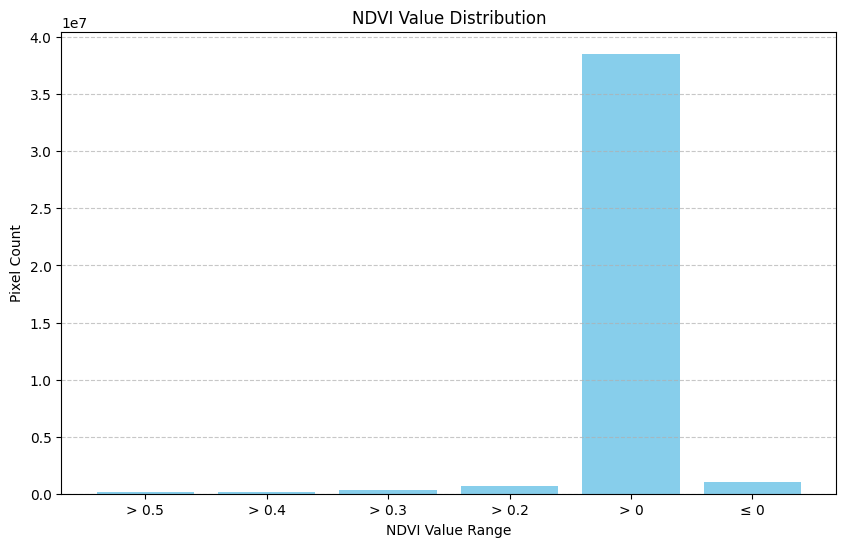

[125330, 165756, 297294, 710596, 38550458, 1044091]


In [6]:
cluster_counts = [0, 0, 0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  
    for col in range(ndvi.shape[1]): 
        value = ndvi[row, col]
        if value > 0.5:
            cluster_counts[0] += 1
        elif value > 0.4:
            cluster_counts[1] += 1
        elif value >0.3:
            cluster_counts[2] += 1
        elif value >0.2:
            cluster_counts[3] += 1

        elif value > 0:
            cluster_counts[4] += 1
        else:
            cluster_counts[5] += 1


cluster_labels = ['> 0.5', '> 0.4', '> 0.3', '> 0.2', '> 0', '≤ 0']

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('NDVI Value Distribution')
plt.xlabel('NDVI Value Range')
plt.ylabel('Pixel Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_counts)

In [7]:
cluster_counts = [0, 0]

for row in range(ndvi.shape[0]):  
    for col in range(ndvi.shape[1]): 
        value = ndvi[row, col]
        if value > 0.22:
            cluster_counts[0] += 1
        else:
            cluster_counts[1] += 1

print(cluster_counts)

[1080758, 39812767]


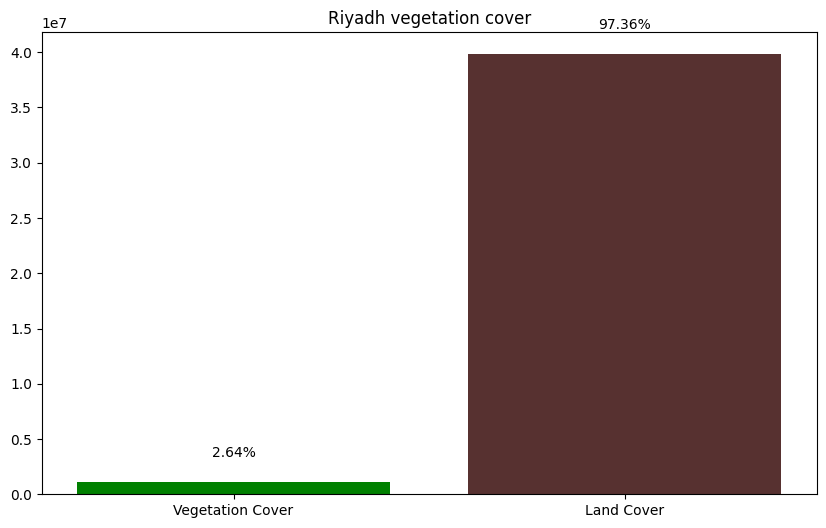

In [8]:
total_count = sum(cluster_counts)

# Calculating percentages for each cluster
percentages = [count / total_count * 100 for count in cluster_counts]
cluster_labels = ['Vegetation Cover', 'Land Cover']
colors = ['green', '#573130']
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Riyadh vegetation cover')

# Adding percentage annotations on each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * total_count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


In [9]:
# Path to your TIFF file
image_path = ("G:\My Drive\Riyadh-Data-set\RUH_Row\RUH-B4-B8_2018-12-15.tif")

# Open the image
data = gdal.Open(image_path)

In [10]:

# Check if the data object is not None
if data is None:
    print("Unable to open the image file.")
else:
    # Get the raster band (assuming you want the first band)
    band = data.GetRasterBand(1)

    # Read the band as an array
    band_1 = band.ReadAsArray()

    # Replace NaN values with a very small number
    band_1_processed = np.nan_to_num(band_1, nan=0.01)

    # Normalize the processed NDVI data to the [0, 1] range
    band_1_min = band_1_processed.min()
    band_1_max = band_1_processed.max()
    band_1_normalized = (band_1_processed - band_1_min) / (band_1_max - band_1_min)


  

In [11]:

# Check if the data object is not None
if data is None:
    print("Unable to open the image file.")
else:
    # Get the raster band (assuming you want the first band)
    band = data.GetRasterBand(2)

    # Read the band as an array
    band_2 = band.ReadAsArray()

    # Replace NaN values with a very small number
    band_2_processed = np.nan_to_num(band_2, nan=0.01)

    # Normalize the processed NDVI data to the [0, 1] range
    band_2_min = band_2_processed.min()
    band_2_max = band_2_processed.max()
    band_2_normalized = (band_2_processed - band_2_min) / (band_2_max - band_2_min)


  

In [12]:


ndvi_2 = (band_2_normalized - band_1_normalized) / (band_2_normalized + band_1_normalized)

C:\Users\Musae\AppData\Local\Temp\ipykernel_17424\977251525.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi_2 = (band_2_normalized - band_1_normalized) / (band_2_normalized + band_1_normalized)


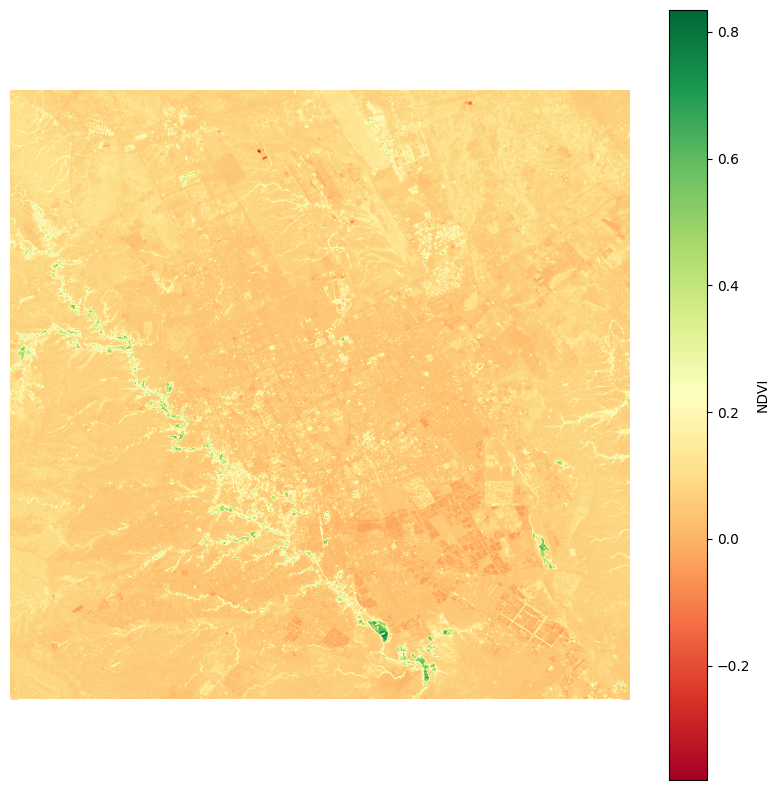

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

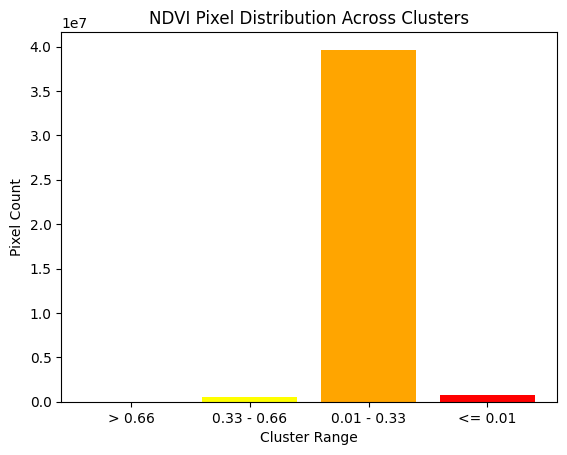

[17079, 527767, 39643412, 705267]


In [14]:
cluster_counts_2 = [0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi_2.shape[0]):  
    for col in range(ndvi_2.shape[1]):  
        value = ndvi_2[row, col]
        if value > 0.66:
            cluster_counts_2[0] += 1
        elif value > 0.33:
            cluster_counts_2[1] += 1
        elif value > 0.01:
            cluster_counts_2[2] += 1
        else:
            cluster_counts_2[3] += 1

clusters = ['> 0.66', '0.33 - 0.66', '0.01 - 0.33', '<= 0.01']
plt.bar(clusters, cluster_counts_2, color=['green', 'yellow', 'orange', 'red'])
plt.title('NDVI Pixel Distribution Across Clusters')
plt.xlabel('Cluster Range')
plt.ylabel('Pixel Count')
plt.show()
print(cluster_counts_2)

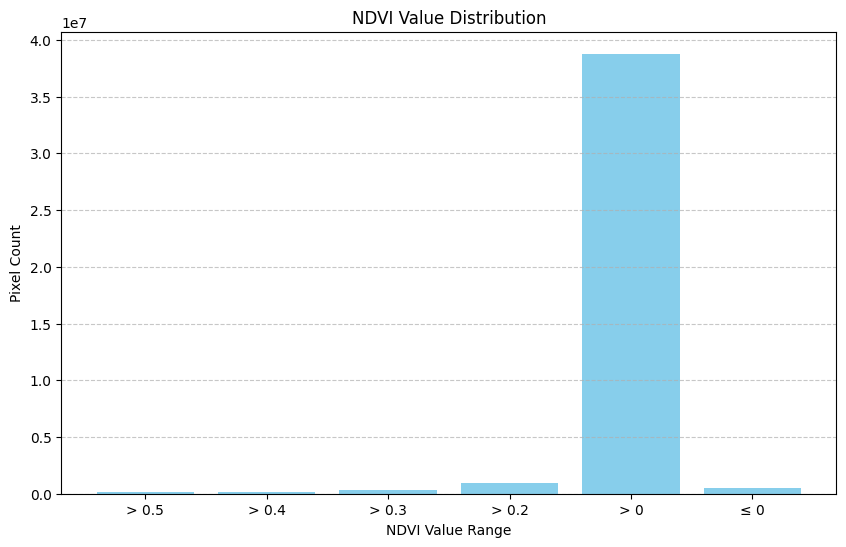

[146183, 184849, 343340, 930065, 38773671, 515417]


In [15]:
cluster_counts_2 = [0, 0, 0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi_2.shape[0]):  
    for col in range(ndvi_2.shape[1]): 
        value = ndvi_2[row, col]
        if value > 0.5:
            cluster_counts_2[0] += 1
        elif value > 0.4:
            cluster_counts_2[1] += 1
        elif value >0.3:
            cluster_counts_2[2] += 1
        elif value >0.2:
            cluster_counts_2[3] += 1

        elif value > 0:
            cluster_counts_2[4] += 1
        else:
            cluster_counts_2[5] += 1


cluster_labels = ['> 0.5', '> 0.4', '> 0.3', '> 0.2', '> 0', '≤ 0']

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts_2, color='skyblue')
plt.title('NDVI Value Distribution')
plt.xlabel('NDVI Value Range')
plt.ylabel('Pixel Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_counts_2)